## 911 Calls Capstone Project
For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


In [2]:
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [8]:
df = pd.read_csv("911.csv")

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Basic Questions


#### What are the top 5 zipcodes for 911 calls?

In [10]:
df["zip"].value_counts().head()

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

#### What are the top 5 townships (twp) for 911 calls?

In [11]:
df["twp"].value_counts().head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [12]:
len(df["title"].unique())

110

### Creating new features
In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Using .apply() with a custom lambda expression for creating a new column called "Reason" that contains this string value.


In [13]:
df["reason"]= df["title"].apply(lambda title : title.split(':')[0])
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


#### The most common Reason for a 911 call based off of this new column?


In [14]:
df["reason"].value_counts()

reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

#### Now using  seaborn to create a countplot of 911 calls by Reason. 


<Axes: xlabel='reason', ylabel='count'>

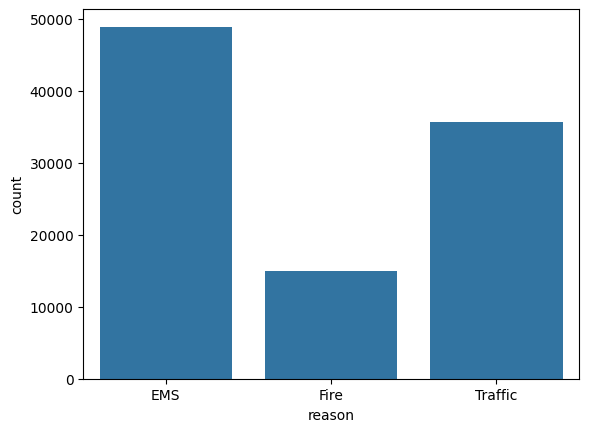

In [15]:
sns.countplot(data = df, x ="reason")


#### Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? 

In [16]:
df["timeStamp"].iloc[0]


'2015-12-10 17:40:00'

#### You should have seen that these timestamps are still strings. 

In [17]:
df["timeStamp"]=pd.to_datetime(df["timeStamp"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
 9   reason     99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.6+ MB


In [18]:
dmap = {1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',7:'Sun'}
df["hour"] = df["timeStamp"].apply(lambda time: time.hour)
df["month"] = df["timeStamp"].apply(lambda time: time.month)
df["day of week"] = df["timeStamp"].apply(lambda time: time.dayofweek)
df["day of week"]=df["day of week"].map(dmap)

In [19]:
df.head()
df["month"].value_counts().sort_index()

month
1     13205
2     11467
3     11101
4     11326
5     11423
6     11786
7     12137
8      9078
12     7969
Name: count, dtype: int64

#### Now using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

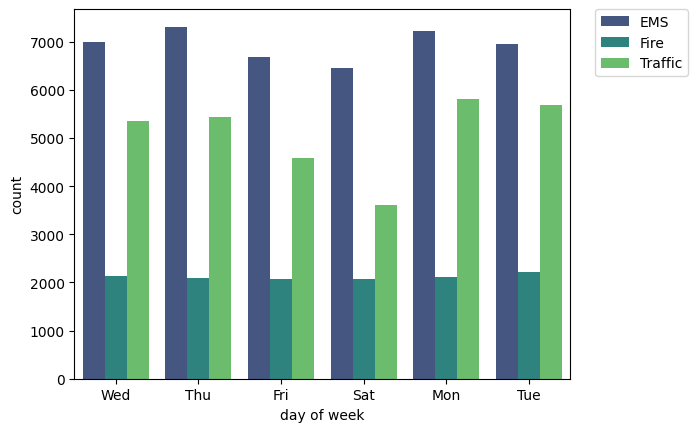

In [20]:
sns.countplot(data = df,x ="day of week",hue ="reason",palette='viridis')
plt.legend( bbox_to_anchor=(1.05, 1),loc =2,borderaxespad=0.)


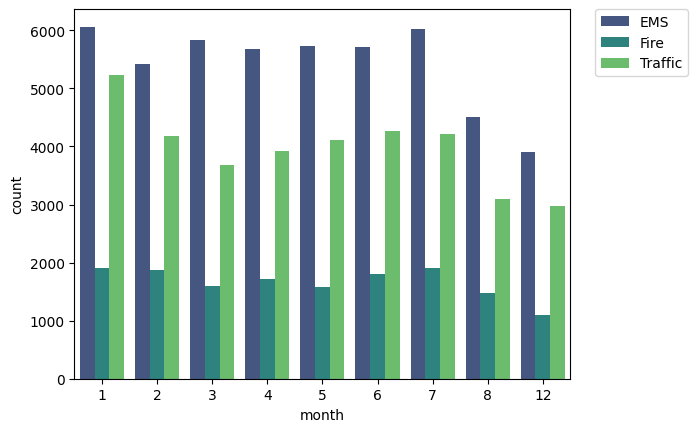

In [21]:
sns.countplot(data = df,x ="month",hue ="reason",palette='viridis')
plt.legend( bbox_to_anchor=(1.05, 1),loc =2,borderaxespad=0.)

#### we can see that some data are missing in the month column, so we have to fill this null value


In [22]:
bymonth = df.groupby("month").count()
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,11478
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,9503
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,9566
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,9728
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,9644
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,10169
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,10445
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,7567
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,6712


#### Now creating a simple plot off of the dataframe indicating the count of calls per month.


<Axes: xlabel='month'>

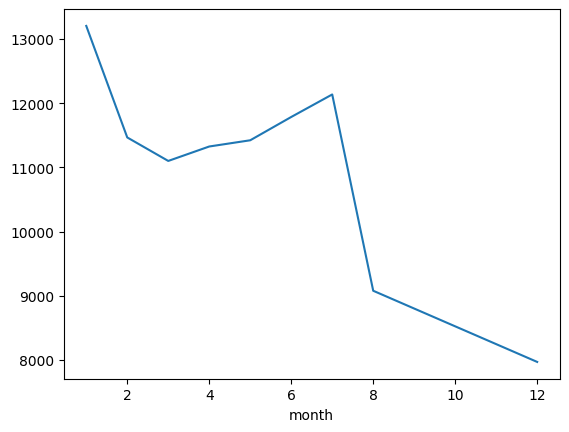

In [23]:
bymonth["lat"].plot()

#### Now see if we  can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. 

C:\Users\tannu\AppData\Local\Temp\ipykernel_23572\3865740072.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df,x ="month",palette='viridis')
C:\Users\tannu\AppData\Local\Temp\ipykernel_23572\3865740072.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend( bbox_to_anchor=(1.05, 1),loc =2,borderaxespad=0.)


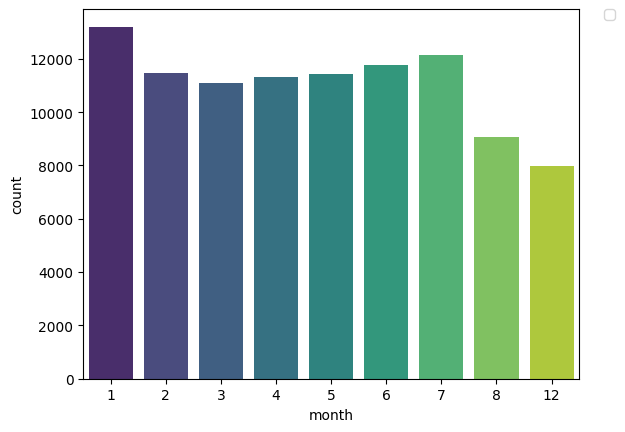

In [24]:
sns.countplot(data = df,x ="month",palette='viridis')
plt.legend( bbox_to_anchor=(1.05, 1),loc =2,borderaxespad=0.)

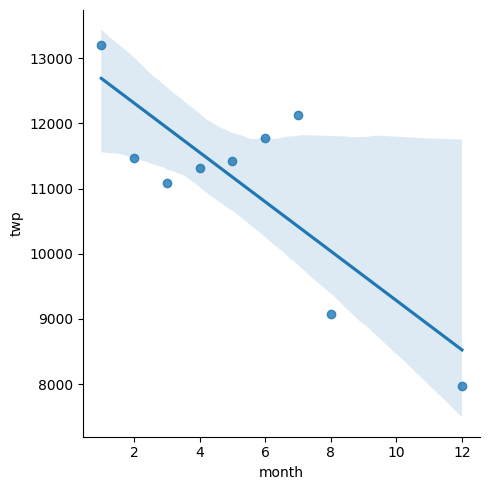

In [25]:
sns.lmplot(data = bymonth.reset_index("month"),x ="month", y = "twp")

#### Creating a new column called 'Date' that contains the date from the timeStamp column. we will need to use apply along with the .date() method.

In [26]:
df["date"] = df["timeStamp"].apply(lambda timeStamp: timeStamp.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Wed,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Wed,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Wed,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Wed,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Wed,2015-12-10


#### Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.


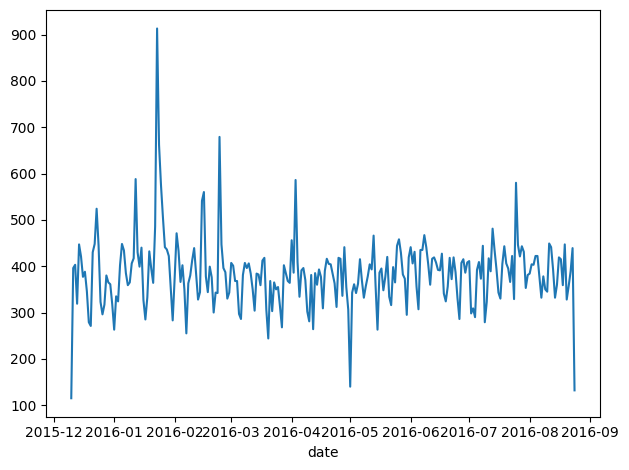

In [27]:
bydate = df.groupby("date").count()
bydate.head()
bydate["lat"].plot()
plt.tight_layout()

#### Now recreating this plot but create 3 separate plots with each plot representing a Reason for the 911 call


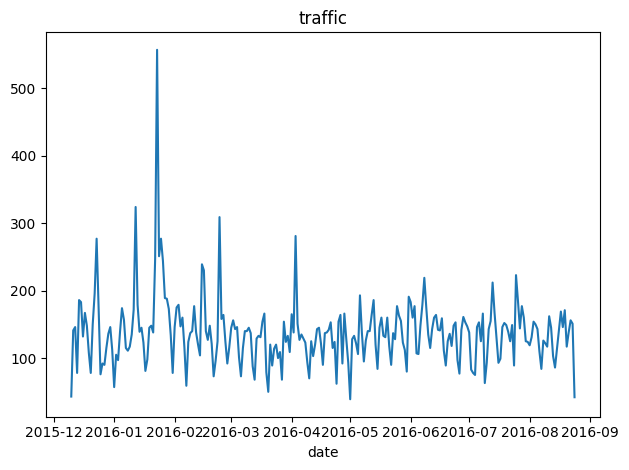

In [28]:
df[df["reason"]=="Traffic"].groupby("date").count()["lat"].plot()
plt.title("traffic")

plt.tight_layout()


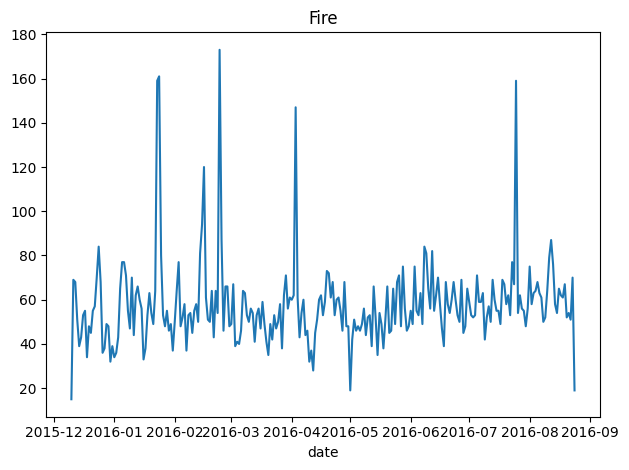

In [29]:
df[df["reason"]=="Fire"].groupby("date").count()["lat"].plot()
plt.title("Fire")
plt.tight_layout()

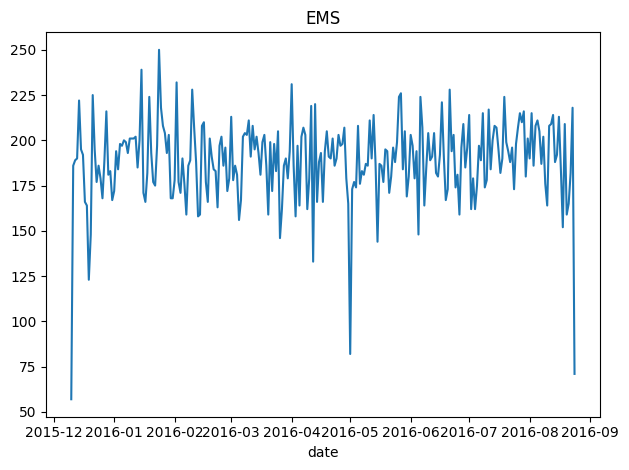

In [30]:
df[df["reason"]=="EMS"].groupby("date").count()["lat"].plot()
plt.title("EMS")
plt.tight_layout()

##### Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack]

In [31]:
df1=df.groupby(["day of week","hour"]).count()['reason'].unstack()
df1

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Mon,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Sat,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Tue,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
Wed,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<Axes: xlabel='hour', ylabel='day of week'>

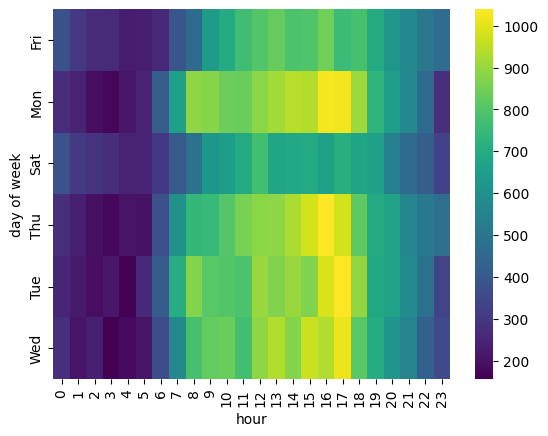

In [32]:
sns.heatmap(df1,cmap="viridis")

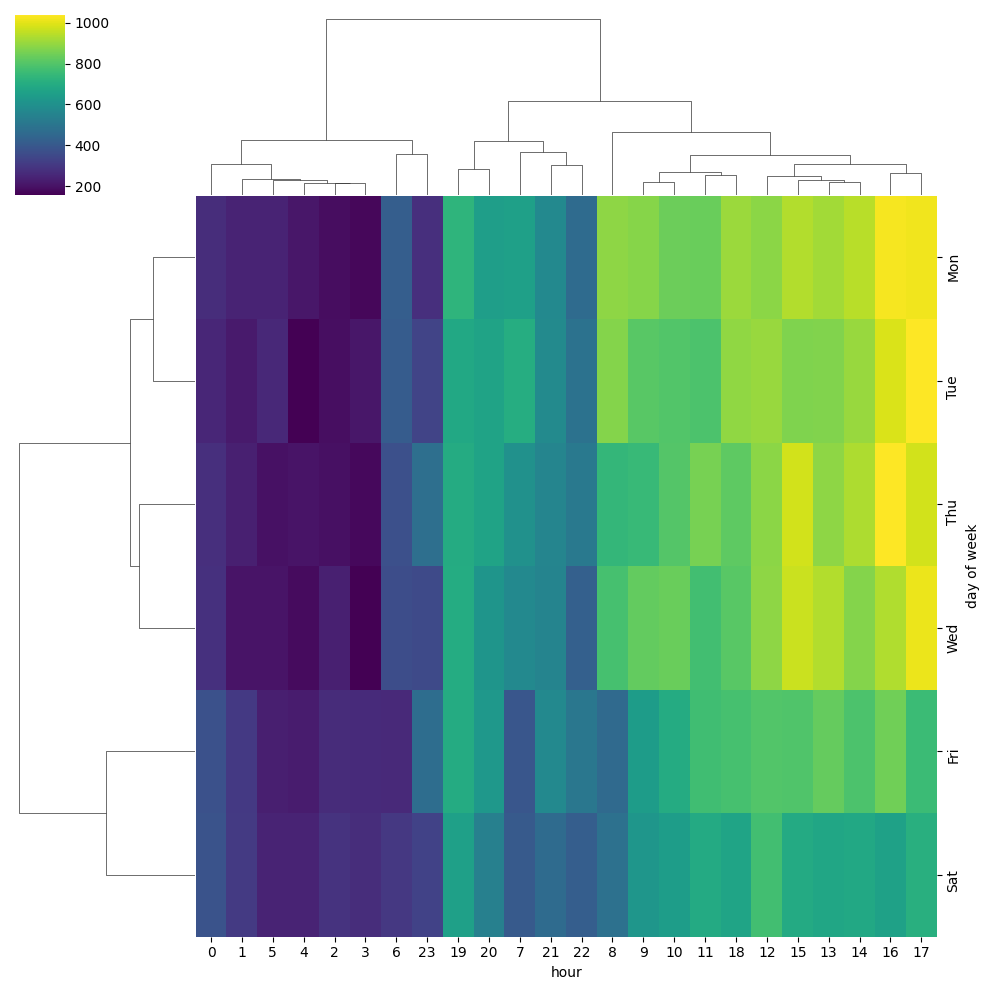

In [35]:
sns.clustermap(data = df1,cmap="viridis")

#### Now repeating these same plots and operations, for a DataFrame that shows the Month as the column.

In [33]:
dfmonth = df.groupby(["day of week","month"]).count()["reason"].unstack()
dfmonth

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,2291,1441,1266,1734,1444,1388,1695,1099,978
Mon,1973,1753,1884,1430,1918,1676,1670,1612,1234
Sat,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1970,1581,1525,1958,1730,1649,2045,1310,1065
Tue,1700,1903,1889,1517,1538,2058,1717,1295,1262
Wed,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Axes: xlabel='month', ylabel='day of week'>

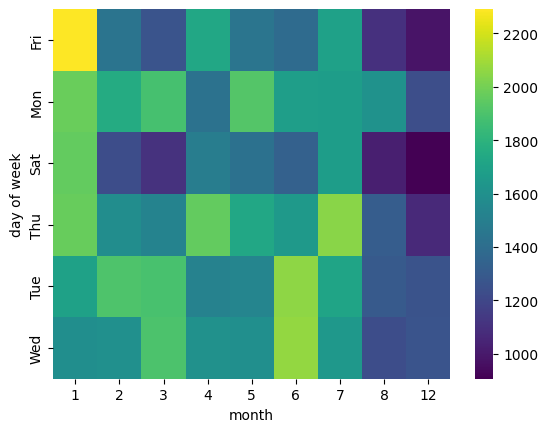

In [34]:
sns.heatmap(data = dfmonth, cmap="viridis")

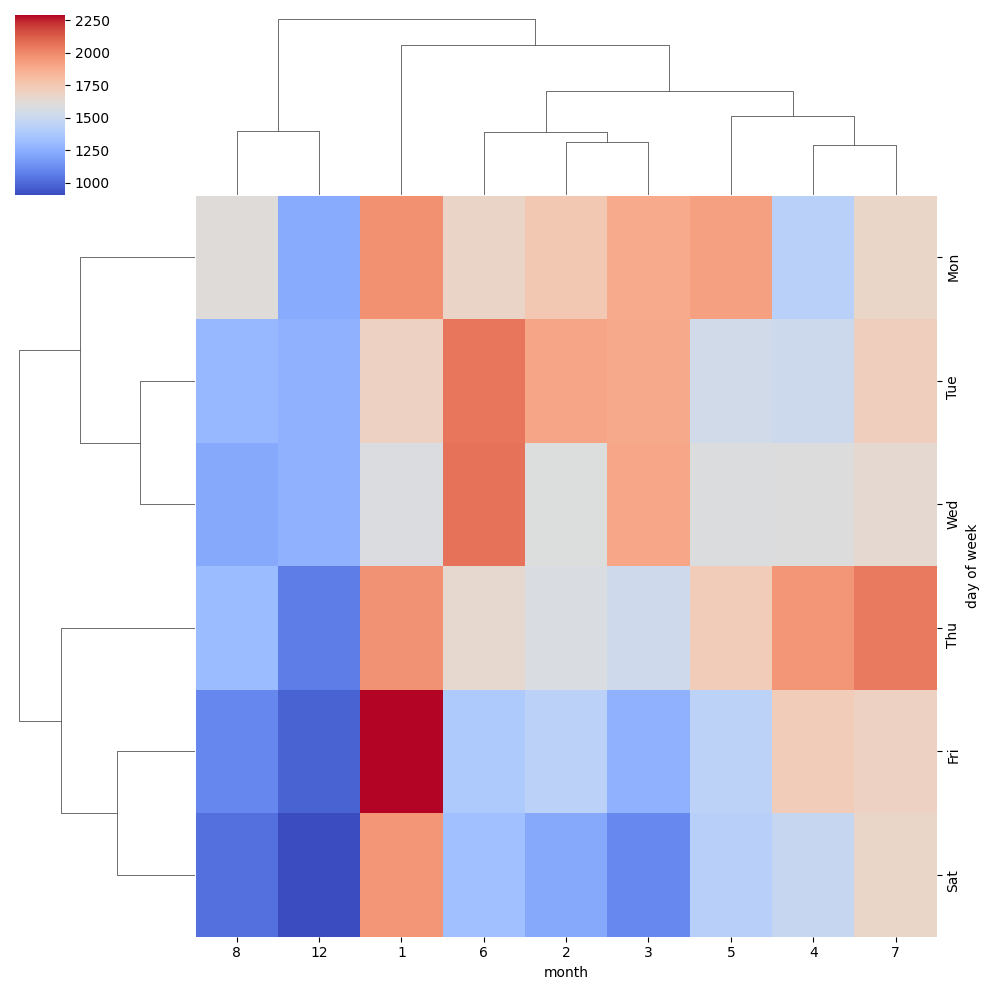

In [36]:
sns.clustermap(data = dfmonth,cmap = "coolwarm")